# Time-Dependent Interaction with a Two-Level System

In [1]:
ob_solve_json = """ 
{
  "ob_atom": {
    "decays": [],
    "energies": [],
    "fields": [
      {
        "coupled_levels": [
          [0, 1]
        ],
        "detuning": 0.0,
        "detuning_positive": true,
        "label": "probe",
        "rabi_freq": 5.0,
        "rabi_freq_t_args": 
        { 
          "ampl_1": 1.0, 
          "on_1": 0.2, 
          "off_1": 0.8
        },
        "rabi_freq_t_func": "square_1"
      }
    ],
    "num_states": 2
  },
  "t_min": 0.0,
  "t_max": 1.0,
  "t_steps": 100,
  "method": "mesolve",
  "opts": {}
} """

In [2]:
from maxwellbloch import ob_solve

ob_two_solve = ob_solve.OBSolve().from_json_str(ob_solve_json)

ob_two_solve.solve(show_pbar=True)

10.9%. Run time:   0.05s. Est. time left: 00:00:00:00
20.8%. Run time:   0.14s. Est. time left: 00:00:00:00
30.7%. Run time:   0.26s. Est. time left: 00:00:00:00
40.6%. Run time:   0.39s. Est. time left: 00:00:00:00
50.5%. Run time:   0.52s. Est. time left: 00:00:00:00
60.4%. Run time:   0.66s. Est. time left: 00:00:00:00
70.3%. Run time:   0.77s. Est. time left: 00:00:00:00
80.2%. Run time:   0.92s. Est. time left: 00:00:00:00
90.1%. Run time:   0.94s. Est. time left: 00:00:00:00
Total run time:   0.97s


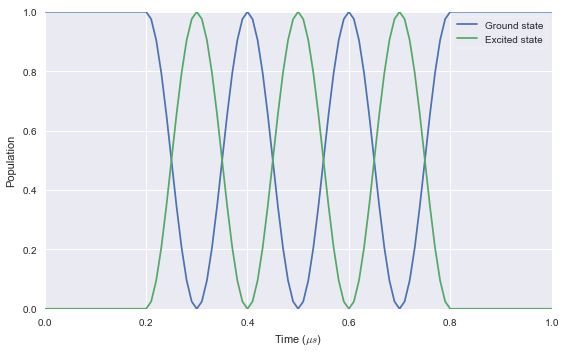

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

pop_0 = np.absolute(ob_two_solve.states_t()[:,0])**2 # Ground state population
pop_1 = np.absolute(ob_two_solve.states_t()[:,1])**2 # Excited state population

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.plot(ob_two_solve.tlist, pop_0, label='Ground state')
ax.plot(ob_two_solve.tlist, pop_1, label='Excited state')
ax.set_xlabel(r'Time ($\mu s$)')
ax.set_ylabel(r'Population')
ax.set_ylim([0.,1])
leg = ax.legend(frameon=True)

plt.savefig('images/{0}.png'.format("04-ob-solve-two-tfunc-square"))